<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Actividad_Semanal_5_Repaso_Transformaci%C3%B3n_y_reducci%C3%B3n_de_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Actividad Semanal 5 Repaso Transformación y reducción de dimensiones
* Fecha: 27/10/2022.
* Roberto Romero Vielma - A00822314
* Profesora titular: María de la Paz Rico Fernández 
* Profesor tutor: Roberto Antonio Guevara González.


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [179]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A) #np.linalg.eig es para sacar los eigenvalues y los eigenvectores

W = vectors
Winv = np.linalg.inv(W) #inversa de W
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.round(np.dot(np.dot(W,D),Winv).real).astype(int) #para multiplicar matrices usamos np.dot (producto punto)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------


In [180]:
#Matriz 1
print("-------Matriz original-------")
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print(A)
print("-----------------------------")
values, vectors = eig(A) #saca los eigenvalues y los eigen vectores
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A) 

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
#para regresar a la matriz original debemos usar la fórmula proporcionada al principio B=W*D*Winv
B=np.round(np.dot(np.dot(W,D),Winv).real).astype(int) #el método real es para que muestre valores reales
print(B) #imprimimos la matriz reconstruida
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------


In [181]:
#Matriz 2
A1 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
values, vectors = eig(A1)
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A1) #Sacamos los valores eigen y sus vectores de A1

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B=np.round(np.dot(np.dot(W,D),Winv).real).astype(int) #np.round redondea el valor
print(B) #imprimos B
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


In [182]:
#Matriz 3
A2 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
values, vectors = eig(A2) #Sacamos los valores eigen y sus vectores de A2
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B=np.round(np.dot(np.dot(W,D),Winv).real).astype(int) #astype(int) para que los valores sean enteros
print(B) #imprmimos B
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


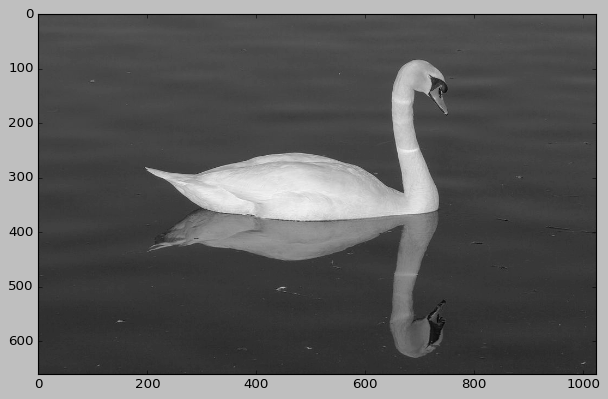

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F7E68414090>


In [183]:
from six.moves import urllib #sirve para obtener datos de internet
from PIL import Image #libreria para trabajar con imágenes
import matplotlib.pyplot as plt #librería para graficar
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA') #cargamos la imagen
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float) #transformamos en un array la imagen jpg

print(imgmat) #imprimimos el array

imgmat.shape = (imggray.size[1],imggray.size[0]) #obtenemos las dimensiones de la imagen

plt.figure(figsize=(9,6)) #tamaño del plot
plt.imshow(imgmat,cmap='gray')
plt.show() #mostramos el plot
print(img) #mostramos la información de la imagen

In [184]:
U,D,V = np.linalg.svd(imgmat) #sacamos los componentes svd
imgmat.shape # primero la altura y después la base


(660, 1024)

In [185]:
U.shape

(660, 660)

In [186]:
V.shape

(1024, 1024)

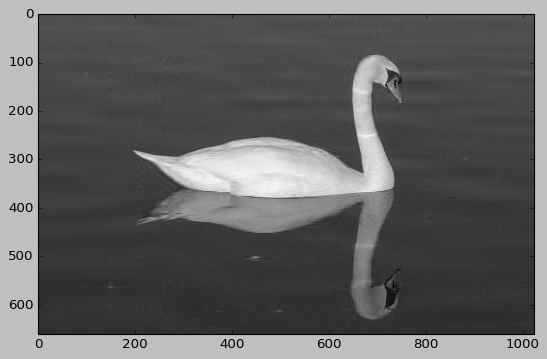

Felicidades la imagen está comprimida


In [187]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50 #con 10 se ve muy pixeleado, en 40 se ve todavía pixeleado, en 50 se distingue más claro,
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[49. 50. 51. ... 21. 20. 19.]


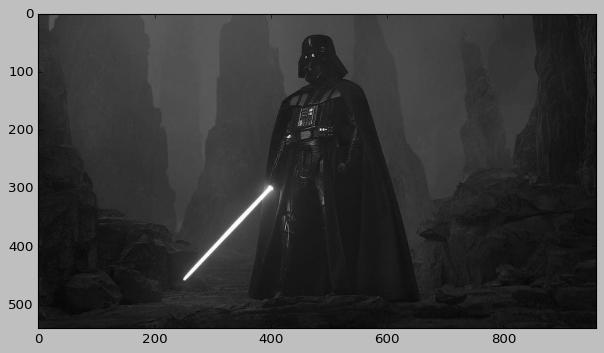

<PIL.Image.Image image mode=LA size=960x540 at 0x7F7E6975E910>


In [188]:
#imagen 1
img1=Image.open(urllib.request.urlopen("https://lumiere-a.akamaihd.net/v1/images/darth-vader-main_4560aff7.jpeg?region=0%2C67%2C1280%2C720&width=960")).convert("LA")#obtenemos la imagen de darth vader
imggray1=img1.convert("LA")
imgmat1=np.array(list(imggray1.getdata(band=0)),float)
print(imgmat1) #imprimos el array con los datos de la imagen

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap="gray")
plt.show() #mostramos la imagen como un gráfico
print(img1)

In [189]:
U,D,V=np.linalg.svd(imgmat1)
imgmat1.shape

(540, 960)

In [190]:
U.shape

(540, 540)

In [191]:
V.shape

(960, 960)

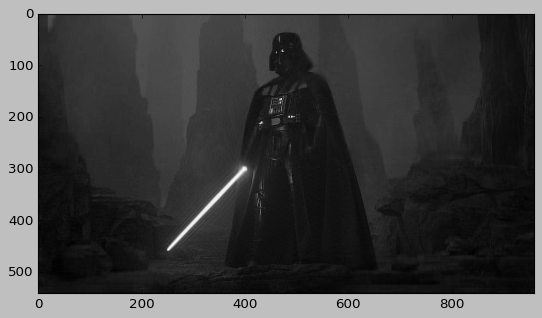

Imagen comprimida número 1


In [192]:

nvalue=80 #elegimos un valor que nos muestra la imagen lo más clara posible
reconstimg1=np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg1,cmap="gray")
plt.show()
print("Imagen comprimida número 1")


[10. 11. 17. ... 11. 11. 11.]


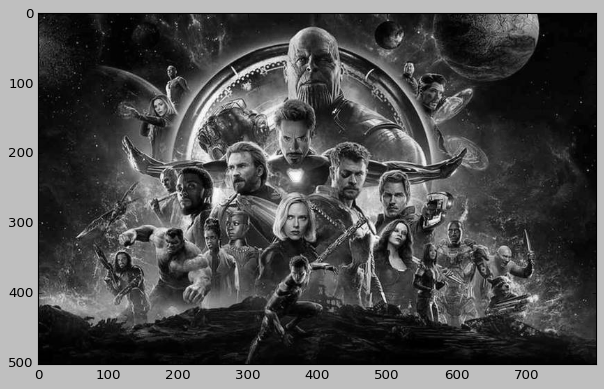

<PIL.Image.Image image mode=LA size=800x502 at 0x7F7E6843D990>


In [193]:
#imagen 2
img2 = Image.open(urllib.request.urlopen("https://www.fayerwayer.com/resizer/O0Ft3ekRTwSKQFGQIkH3nFN8FHI=/800x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/metroworldnews/JRAA24NRQZGUJKCZDSRRDXLPDM.jpg")).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

In [194]:
U,D,V = np.linalg.svd(imgmat2)
imgmat2.shape

(502, 800)

In [195]:
U.shape #altura

(502, 502)

In [196]:
V.shape #base

(800, 800)

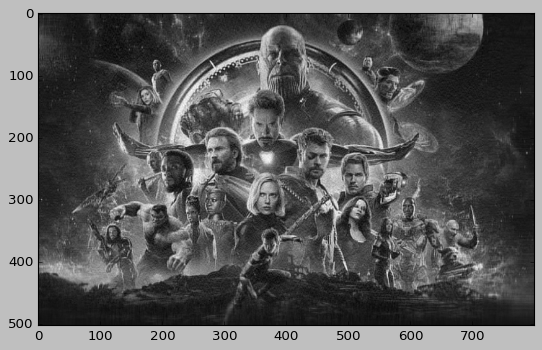

Felicidades la imagen 2 está comprimida


In [197]:
nvalue = 120 #con 120 se ve bien la imagen, ponerle 0 hace que la imagen se ponga oscura

reconstimg2 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen 2 está comprimida")

[16. 16. 16. ... 48. 48. 48.]


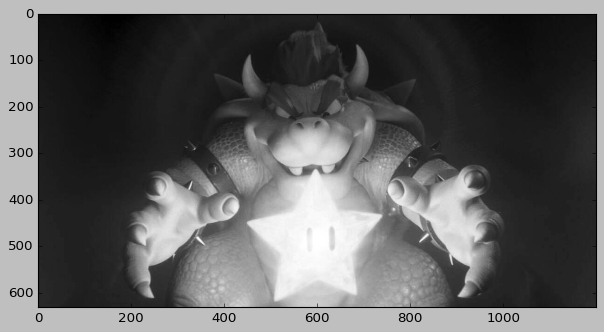

<PIL.Image.Image image mode=LA size=1200x630 at 0x7F7E684B54D0>


In [198]:
#imagen 3
img3 = Image.open(urllib.request.urlopen('https://media.vandal.net/i/1200x630/10-2022/202210715371951_1.jpg')).convert('LA') #abre la imagen en la página web
imggray3 = img3.convert('LA') #convertie imagen a color gris
imgmat3 = np.array(list(imggray3.getdata(band=0)),float) #transforma la imagen en un array

print(imgmat3) #imprimos el array

imgmat3.shape = (imggray3.size[1],imggray3.size[0]) #mostramos el tamaño de la imagen

plt.figure(figsize=(9,6)) #definimos el tamaño de la gráfica
plt.imshow(imgmat3,cmap='gray')
plt.show()# mostramos el g´rafico
print(img3) #mostramos los datos de la imagen

In [199]:
U,D,V=np.linalg.svd(imgmat3) 
imgmat3.shape

(630, 1200)

In [200]:
U.shape

(630, 630)

In [201]:
V.shape

(1200, 1200)

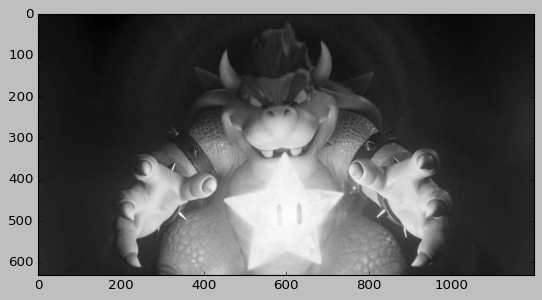

Felicidades la imagen 3 está comprimida


In [202]:
nvalue=100 #con 100 se ve casi igual
reconstimg3 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show() # muestra la imagen
print("Felicidades la imagen 3 está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

#Cargamos los datos
iris=datasets.load_iris()
X=iris.data
y=iris.target

Z-score estará dado por: ${z = (x - u) / s}$

donde ${u}$ es la media del conjunto ${x}$ y ${s}$ es la desviación estándar del conjunto ${x}$.

In [204]:
#Hacemos el Z-score de las características
scaler=StandardScaler() #la media que en 0 y los límites entre -3 y 3 (normalmente)
scaler.fit(X) #indicamos que queremos escalar los datos del conjunto X

X=scaler.transform(X) #transformamos los datos con el método Z-score

#Modelo PCA
pca=PCA(n_components=2) #Estimamos solo 2 PCs
X_new=pca.fit_transform(X) #Proyectamos los datos originales en el espacio PCA

Visualizamos como quedan los datos antes y después del **PCA**, además de que mostramos cada punto de la gráfica de diferente color, dependiendo de la **clase de la flor (y)**.

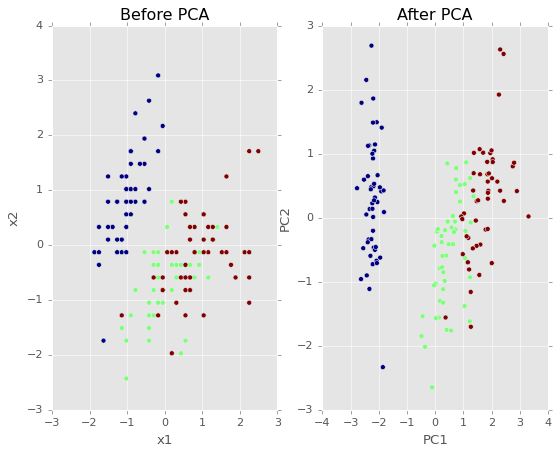

In [205]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y) # X[:,0] es X1 y X[:,1] es X2, c=y el color depende de la clase (en este caso son 3)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y) # X[:,0] es PC1 y X[:,1] es PC2, c=y el color depende de la clase (en este caso son 3)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Podemos ver que en el espacio de PCA, la **varianza** es **maximizada** sobre **PC1**, explicando el 73% de la varianza y **PC2** el 22%, juntas explican el 95%.

In [206]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


La **prueba de la máxima varianza** puede obtenerse estimando la **covarianza** de la matriz del **espacio reducido:**

In [207]:
np.cov(X_new.T) 

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

Observamos que estos valores (en la diagonal tenemos las varianzas) son **iguales** a los **valores eigen actuales** de la covarianza guardados en
```
pca.explained_variance_
```
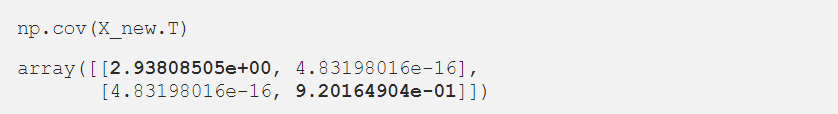





In [208]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

**Importancia de las características (features)**

La importancia de cada **feature** se refleja en la **magnitud** de los valores correspondientes en los **vectores eigen** (mayor magnitud - mayor importancia).

Para encontrar las features más importantes hacemos lo siguiente:


In [209]:
print(abs(pca.components_))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


**pca.components_** tiene la forma **[n_componentes, n_características]** por lo que al observar **PC1** (primer componente principal) que es la **primera fila**



```
[0.52106591 0.26934744 0.5804131  0.56485654]
```

podemos concluir que las **features 1, 3 y 4** son las más importantes para **PC1**, mientras que para **PC2** la **feature** **2** y después **1** son las más importantes, mientras más grandes sean sus valores absolutos, más contribuirá la feature al componente principal.


Un **biplot** es la mejor forma de visualizar todo tras un análisis PCA, para ello usaremos una función para graficar el biplot

In [210]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # proyección en PC1
    ys = score[:,1] # proyección en PC2
    n = coeff.shape[0] # número de variables
    plt.figure(figsize=(10,8), dpi=100) #tamaño de la figura
    classes = np.unique(y) #separá en las 3 clases que tiene y
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color basado en el grupo
    for i in range(n):
        # gráfica como flechas los resultados de las variables(cada variable tiene un score para PC1 y uno para PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

Llamamos a la función

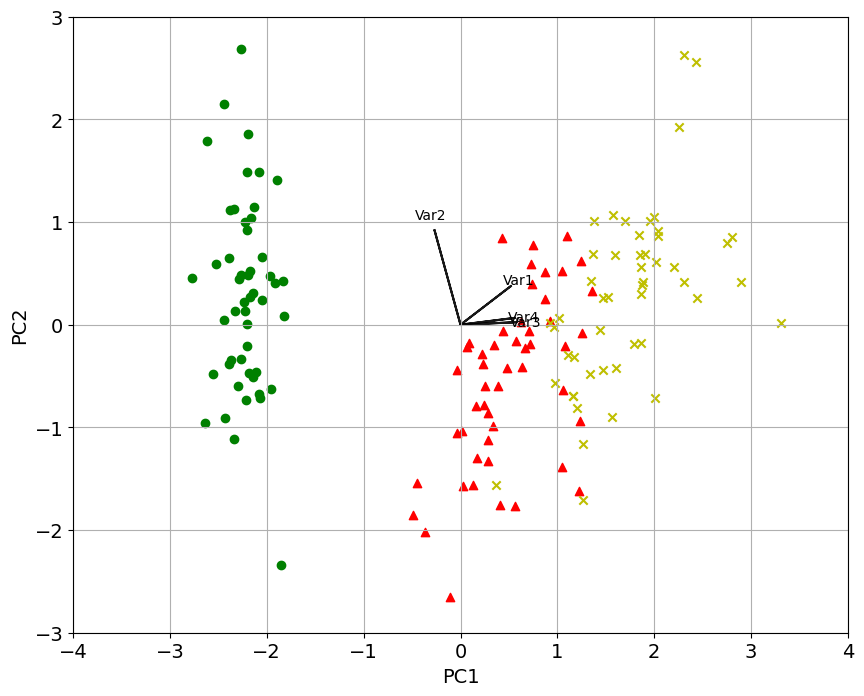

In [211]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reseteamos el estilo ggplot
# Llamamos la función biplot para solamente los 2 primeros PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Visualmente sabemos lo siguiente:
- La varianza está maximizada
- Las características 1, 3 y 4 son las más importantes para PC1. De forma similar, las características 2 y 1 son las más importantes para PC2.

Las flechas (variables/features) que apuntan en la misma dirección indican una **correlación** entre las variables que representan, mientras que las flechas que apunten en dirección contraria indican un **contraste** entre las variables que representan.

Para verificar lo anteriormente dicho hacemos lo siguiente:



In [212]:
# Var 3 y Var 4 están fuertemente correlacionadas positivamente
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [213]:
# Var 2 y Var 3 están negativamente correlacionadas
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Para realizar el Análisis de Componentes Principales (PCA), primero debemos usar la función StandardScaler, llamada Z-Score, que tiene de media 0 y los límites entre -3 y 3 (generalmente), para escalar todas las features a un mismo rango, y de esa forma evitar que una feature tenga más peso que otra, con el método PCA de scikit-learn se obtuvo que PC1 tiene una varianza del 73% y PC2 una varianza del 22%, lo que en total da un 95% de toda la varianza.

El método Components dentro de PCA, permite conocer que features son más importantes para cada componente principal, teniendo que en PC1 los features 1, 3 y 4 son los más importantes, mientras que en PC2 la feature 2 es la más importante seguida de 1. Del gráfico se pudo obtener que las features 3 y 4 que se encuentran en el mismo sentido, están fuertemente correlacionadas de manera positiva, mientras que las features 3 y 4, se encuentran en sentidos opuestos y están negativamente correlacionadas.




# ¿Qué es feature importance y para que nos sirve? 

Feature importance se refiere a asignar resultados a las features (columnas) de entrada, los resultados estarán dentro del rango de 0 a 100, basándose en la importancia que tienen para predecir la salida, en otras palabras, determina el grado de utilidad que una variable en específico tiene dentro de un conjunto de datos, mientras mayor sea el resultado de una columna, mayor será su importancia para explicar el conjunto de datos. Feature importance nos sirve para determinar la relación que existe entre las variables independientes y las dependientes, al analizar la importancia de los resultados de las variables, podemos descartar las columnas (features) que son irrelevantes, lo que puede hacer que nuestros algoritmos predictivos sean menos complejos, no solo eso, sino que además puede mejorar su desempeño.

# ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio? 

Durante la realización del ejercicio de features, se descubrió que los 2 primeros componentes principales almacenan el 95% de la varianza, siendo que en PC1 las features más importantes son 1, 3 y 4, mientras que para PC2, las features 1 y 2 son las más importantes, también se descubrió que las variables 3 y 4 están en la misma dirección y por ende tienen una correlación positiva, mientras que la variable 2 y 3 se encuentran en diferente sentido por lo que se encuentran correlacionadas de forma negativa.

# ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
Donde yo aplicaría este conocimiento sería en la reducción de dimensionalidad, de un conjunto de datos que cuente con demasiadas columnas, en particular me resultaría útil este conocimiento en proyectos relacionados a reconocimiento facial, visión por computadora y la compresión de imágenes.


# Referencias bibliográficas
Baeldung. (2022). What is Feature Importance in Machine Learning? https://www.baeldung.com/cs/ml-feature-importance

Shin, T. (2021). Understanding Feature Importance and How to Implement it in Python. Towards Data Science. https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.
